In [30]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#create a dataframe 
df = pd.read_csv("heart.csv")
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#to get the number of rows and columns
df.shape

(1025, 14)

In [6]:
#to get the detail information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#to get statistical info 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking missing values
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

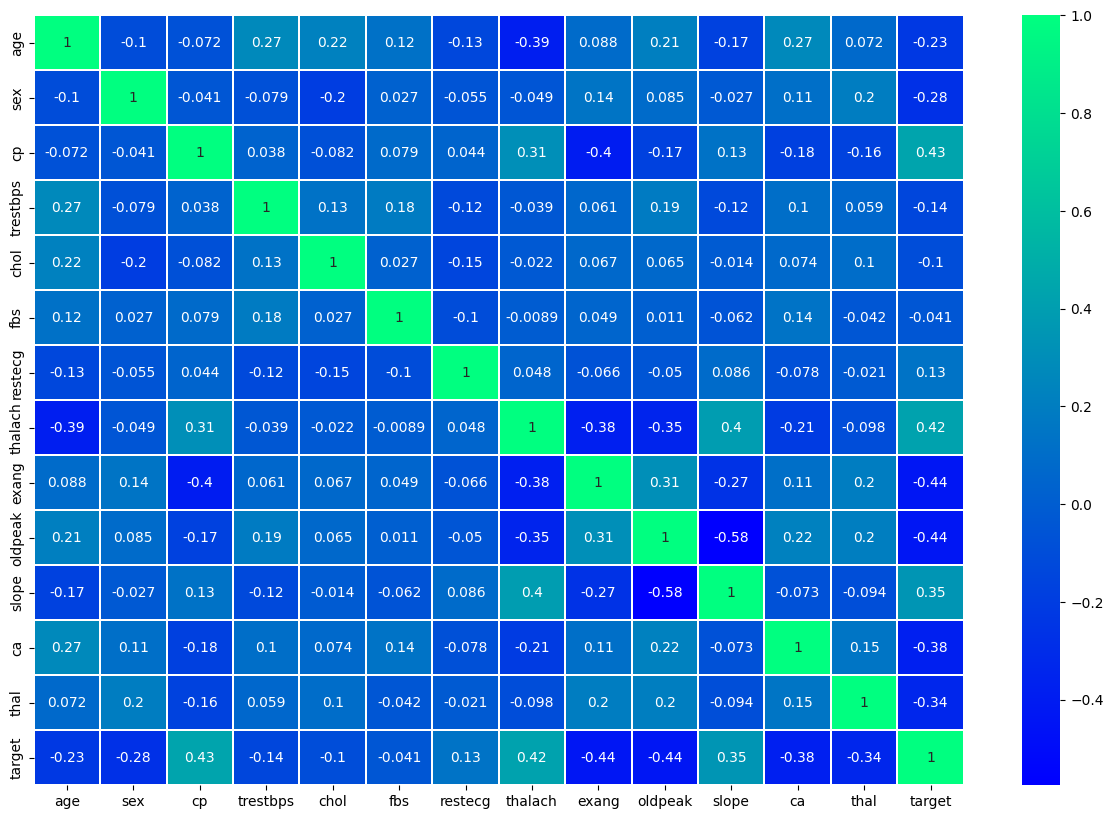

In [11]:
#correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , linewidth = .01, annot=True , cmap="winter")
plt.show()



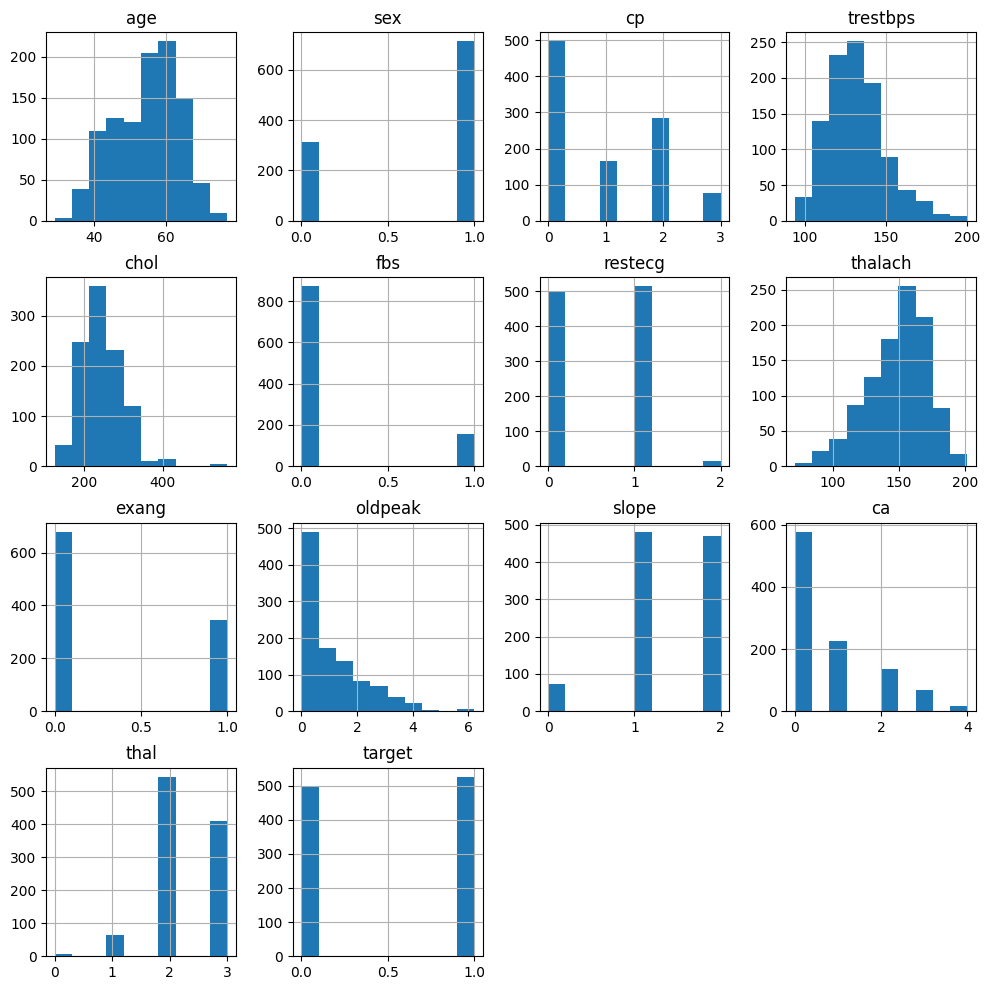

In [12]:
#create a histogram
df.hist(figsize=(12,12))
plt.savefig ('featuresplot')

In [13]:
#choosing X (independent , input variables) and y (dependent , output variables) 
#in this case my output is the 'target' variable so considering it as y.
#X -> all the rows except target.
X = df.iloc[: , :-1]
y = df.iloc[:,-1]


In [14]:
#spliting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.25,random_state=42)

In [15]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,57,0,0,140,241,0,1,123,1,0.2,1,0,3
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3
926,54,1,0,110,206,0,0,108,1,0.0,1,1,2
249,42,1,2,130,180,0,1,150,0,0.0,2,0,2


In [16]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
940    0
787    0
926    0
249    1
552    0
Name: target, Length: 257, dtype: int64

In [17]:
#creating a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression () 

In [18]:
#training the model on training data after creating object of LogisticRegression
model.fit(X_train , y_train)

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
#predicting the nodel on testing data
y_predict = model.predict(X_test)
print(y_predict) 

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0]


In [21]:
#to get the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , y_predict)) 

0.8054474708171206


In [22]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,y_predict))

[[ 99  33]
 [ 17 108]]


In [23]:
from sklearn.metrics import classification_report
print (classification_report (y_test , y_predict) )

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       132
           1       0.77      0.86      0.81       125

    accuracy                           0.81       257
   macro avg       0.81      0.81      0.81       257
weighted avg       0.81      0.81      0.81       257



In [32]:
#final model implementation
input = (62,0,0,124,209,0,1,163,0,0.0,2,0,2)
arr1 = np.asarray(input)
print(arr1) 

arr2 = arr1.reshape(1,-1)

y_predict = model.predict(arr2)

if(y_predict == 1) :
    print ("The patient is having heart disease")
else:
    print("The patient is not having heart disease") 
    

[ 62.   0.   0. 124. 209.   0.   1. 163.   0.   0.   2.   0.   2.]
The patient is having heart disease


In [36]:

from sklearn.preprocessing import PowerTransformer


# Scale data using PowerTransformer (handles skewed data better)
scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(solver='liblinear', C=0.5, penalty='l2', max_iter=200)
model.fit(X_train_scaled, y_train)

# Validation and test accuracy
val_acc = model.score(X_val_scaled, y)
test_acc = model.score(X_test_scaled, y_test)

print(f"Validation Accuracy (PowerTransformer): {val_acc:.4f}")
print(f"Test Accuracy (PowerTransformer): {test_acc:.4f}")



Validation Accuracy (PowerTransformer): 0.8537
Test Accuracy (PowerTransformer): 0.8016
